# Introduction
This project analyzes data from on-line dating application OKCupid. In recent years, there has been a massive rise in the usage of dating apps to find love. Many of these apps use sophisticated data science techniques to recommend possible matches to users and to optimize the user experience. These apps give us access to a wealth of information that we've never had before about how different people experience romance.

The goal of this project is to scope, prep, analyze, and create a machine learning model to solve a question.

#### Data sources:

profiles.csv was provided by Codecademy.com.

## Scoping
It's beneficial to create a project scope whenever a new project is being started. Below are four sections to help guide the project process and progress. The first section is the project goals, a section to define the high-level objectives and set the intentions for this project. The next section is the data, luckily in this project, data is already provided but still needs to be checked if project goals can be met with the available data. Thirdly, the analysis will have to be thought through, which include the methods and aligning the question(s) with the project goals. Lastly, evaluation will help build conclusions and findings from the analysis.

## Project Goals
In this project, the goal is to utilize the skills learned through Codecademy and apply machine learning techniques to a data set. The primary research question that will be answered is whether an OkCupid's user astrological sign can be predicted using other variables from their profiles. This project is important since many users find astrological signs an important part of matches, and if users don't input their sign, OkCupid would like to predict which sign they might be.

## Data
The project has one data set provided by Codecademy called profiles.csv. In the data, each row represents an OkCupid user and the columns are the responses to their user profiles which include multi-choice and short answer questions.

## Analysis
This solution will use descriptive statistics and data visualization to find key figures in understanding the distribution, count, and relationship between variables. Since the goal of the project to make predictions on the user's astrological signs, classification algorithms from the supervised learning family of machine learning models will be implemented.

## Evaluation
The project will conclude with the evaluation of the machine learning model selected with a validation data set. The output of the predictions can be checked through a confusion matrix, and metrics such as accuracy, precision, recall, F1 and Kappa scores.

## Import Python Modules¶
First import the modules being used for this project:

In [9]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Loading the Data

To analyze the user profiles from OkCupid, pandas will be used to load the dataset into a DataFrame so that it can be explored and visualized with Python.

Here profiles.csv is loaded into a DataFrame called profiles. The DataFrame is then briefly examined using .head() to check the contents.

In [12]:
profiles = pd.read_csv('profiles.csv', encoding='utf-8')
profiles.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


####  Data Characteristics
profiles has 59,946 rows and 31 columns, this is a good sign since there seems to be enough data for machine learning.

The columns in the dataset include:

- age: continuous variable of age of user 
- body_type: categorical variable of body type of user
- diet: categorical variable of dietary information
- drinks: categorical variable of alcohol consumption
- drugs: categorical variable of drug usage
- education: categorical variable of educational attainment
- ethnicity: categorical variable of ethnic backgrounds
- height: continuous variable of height of user
- income: continuous variable of income of user
- job: categorical variable of employment description
- offspring: categorical variable of children status
- orientation: categorical variable of sexual orientation
- pets: categorical variable of pet preferences
- religion: categorical variable of religious background
- sex: categorical variable of gender
- sign: categorical variable of astrological symbol
- smokes: categorical variable of smoking consumption
- speaks: categorical variable of language spoken
- status: categorical variable of relationship status
- last_online: date variable of last login
- location: categorical variable of user locations

And a set of open short-answer responses to :

- essay0: My self summary
- essay1: What I’m doing with my life
- essay2: I’m really good at
- essay3: The first thing people usually notice about me
- essay4: Favorite books, movies, show, music, and food
- essay5: The six things I could never do without
- essay6: I spend a lot of time thinking about
- essay7: On a typical Friday night I am
- essay8: The most private thing I am willing to admit
- essay9: You should message me if…

In [13]:
list(profiles.columns)

['age',
 'body_type',
 'diet',
 'drinks',
 'drugs',
 'education',
 'essay0',
 'essay1',
 'essay2',
 'essay3',
 'essay4',
 'essay5',
 'essay6',
 'essay7',
 'essay8',
 'essay9',
 'ethnicity',
 'height',
 'income',
 'job',
 'last_online',
 'location',
 'offspring',
 'orientation',
 'pets',
 'religion',
 'sex',
 'sign',
 'smokes',
 'speaks',
 'status']

### Explore the Data
First to be explored is the number of unique signs, and the values. It seems that there are 48, but there should only be 12 signs. Upon closer inspection, there seems to be qualifiers attached with the signs.

In [14]:
print('Number of categories:',profiles.sign.nunique())
print('Categories:', profiles.sign.unique())

Number of categories: 48
Categories: ['gemini' 'cancer' 'pisces but it doesn&rsquo;t matter' 'pisces'
 'aquarius' 'taurus' 'virgo' 'sagittarius'
 'gemini but it doesn&rsquo;t matter' 'cancer but it doesn&rsquo;t matter'
 'leo but it doesn&rsquo;t matter' nan
 'aquarius but it doesn&rsquo;t matter'
 'aries and it&rsquo;s fun to think about'
 'libra but it doesn&rsquo;t matter'
 'pisces and it&rsquo;s fun to think about' 'libra'
 'taurus but it doesn&rsquo;t matter'
 'sagittarius but it doesn&rsquo;t matter' 'scorpio and it matters a lot'
 'gemini and it&rsquo;s fun to think about'
 'leo and it&rsquo;s fun to think about'
 'cancer and it&rsquo;s fun to think about'
 'libra and it&rsquo;s fun to think about'
 'aquarius and it&rsquo;s fun to think about'
 'virgo but it doesn&rsquo;t matter'
 'scorpio and it&rsquo;s fun to think about'
 'capricorn but it doesn&rsquo;t matter' 'scorpio'
 'capricorn and it&rsquo;s fun to think about' 'leo'
 'aries but it doesn&rsquo;t matter' 'aries'
 'scorpi

#### Clean labels
It is important that we clean the labels since this is what will be predicted and 48 predictions would be quite difficult. By taking the first word of the column, the signs can be saved without the qualifiers. The qualifiers could be used for another problem down the line.

In [17]:
profiles['signsCleaned'] = profiles.sign.str.split().str.get(0)
print('number of categories:',profiles.signsCleaned.nunique())
print('categories:', profiles.signsCleaned.unique())

profiles.signsCleaned.value_counts()

number of categories: 12
categories: ['gemini' 'cancer' 'pisces' 'aquarius' 'taurus' 'virgo' 'sagittarius'
 'leo' nan 'aries' 'libra' 'scorpio' 'capricorn']


leo            4374
gemini         4310
libra          4207
cancer         4206
virgo          4141
taurus         4140
scorpio        4134
aries          3989
pisces         3946
sagittarius    3942
aquarius       3928
capricorn      3573
Name: signsCleaned, dtype: int64

### Continous Variables
##### age
The next plot shows the distribution of age in the group. It seems that most users are in their late 20s to early 30s.

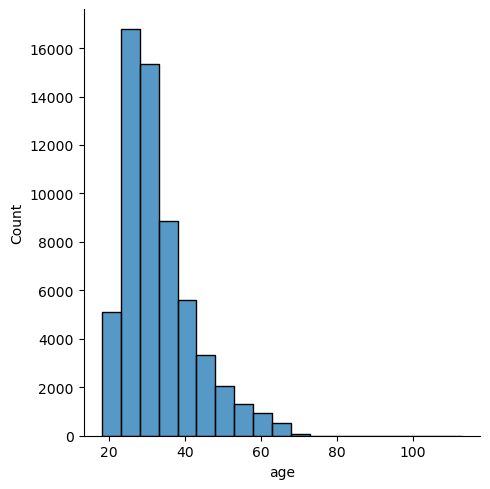

In [18]:
sns.displot(data=profiles, x='age', kind='hist', binwidth=5)

Here is the same chart but broken down by gender. It seems that there are proportionally similar break down of gender by age, but slightly fewer females overall.

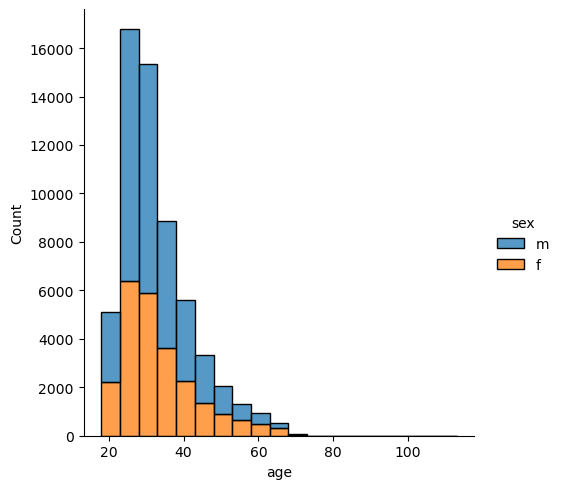

In [19]:
sns.displot(data=profiles, x='age', hue='sex', kind='hist', binwidth=5, multiple='stack')

Height
The next plot shows the height variable, most people look like they are between 5 feet tall and 6.5 feet tall.

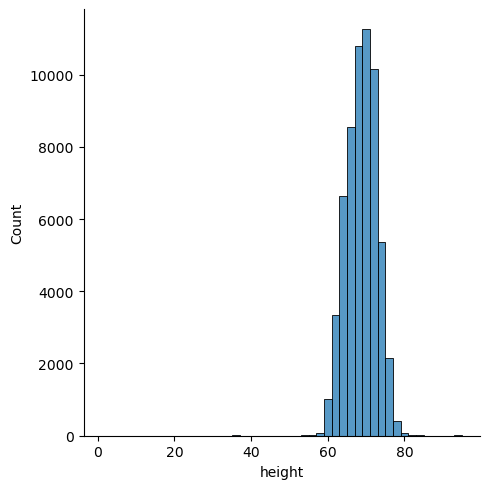

In [20]:
sns.displot(data=profiles, x='height', kind='hist', binwidth=2)

Here is the same height chart showing the break down by gender. It seems obvious, but females tend to be shorter than males and looks to have a normal distribution.

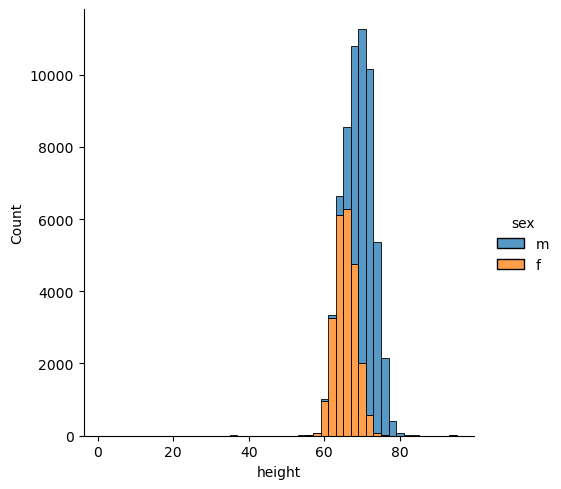

In [22]:
sns.displot(data=profiles, x='height', hue='sex', kind='hist', binwidth=2, multiple='stack')

Income
Here is the data of income, it seems that the majority of the participants do not include their income figures.

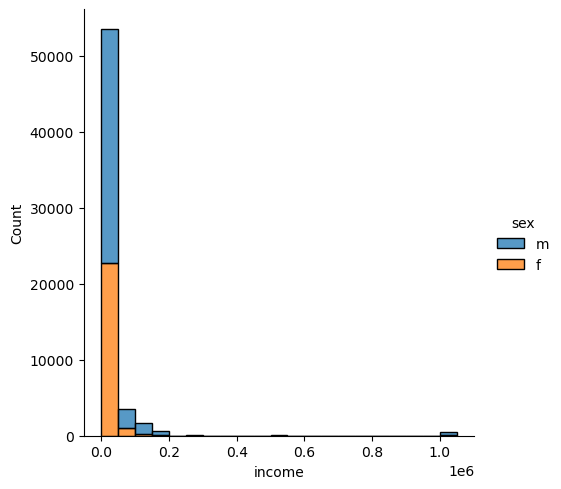

In [23]:
sns.displot(data=profiles, x="income",hue="sex", kind="hist", binwidth = 50000, multiple = "stack")

### Discrete Variables
#### Sex
Previously it was identified that there are more males in the data, and it seems that there are ~35,000 men to ~25,000 women.

<Axes: xlabel='count', ylabel='sex'>

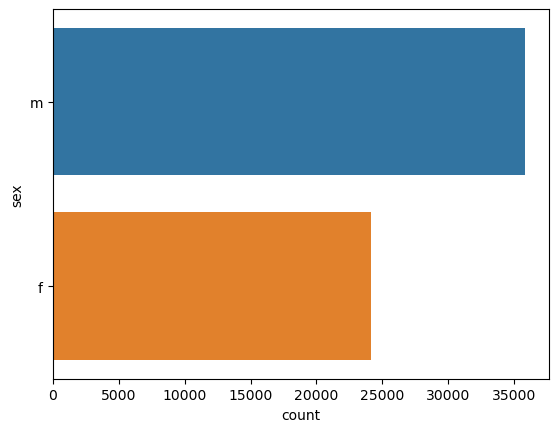

In [24]:
sns.countplot(data=profiles, y='sex')

#### Body Type
The next chart shows the body type variable, and it seems that most users will describe themselves as average, fit, or athletic.

<Axes: xlabel='count', ylabel='body_type'>

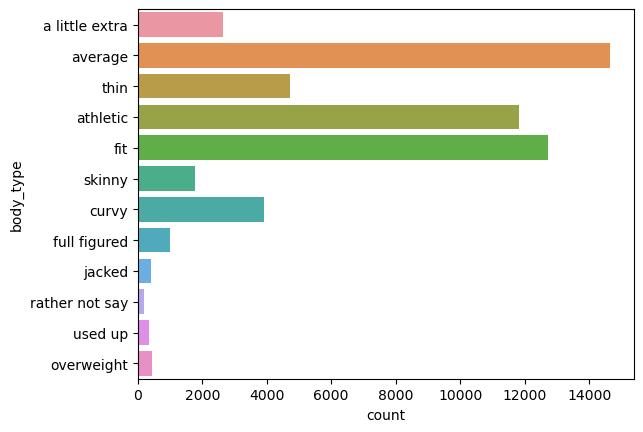

In [25]:
sns.countplot(data=profiles, y='body_type')

The next chart shows the break down of body type by gender and it seems that some of the body type descriptions are highly gendered. For example "curvy" and "full figured" are highly female descriptions, while males use "a little extra", and "overweight" more often.

<Axes: xlabel='count', ylabel='body_type'>

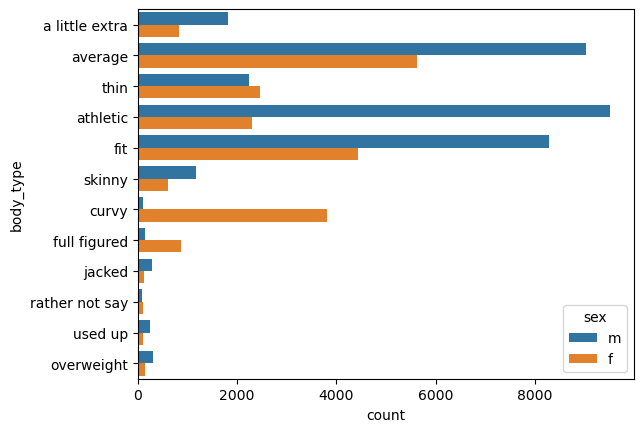

In [26]:
sns.countplot(data=profiles, y='body_type', hue='sex')

#### Diet
Here is a chart of the dietary information for users. Most user eat "mostly anything", followed by "anything", and "strictly anything", being open-minded seems to be a popular signal to potential partners.

<Axes: xlabel='count', ylabel='diet'>

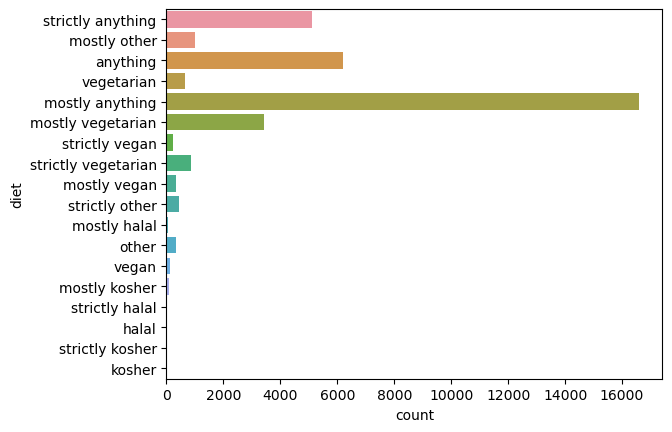

In [27]:
sns.countplot(data=profiles, y='diet')

#### Drinks
The next plot shows that the majority of the users drink "socially", then "rarely" and "often".

<Axes: xlabel='count', ylabel='drinks'>

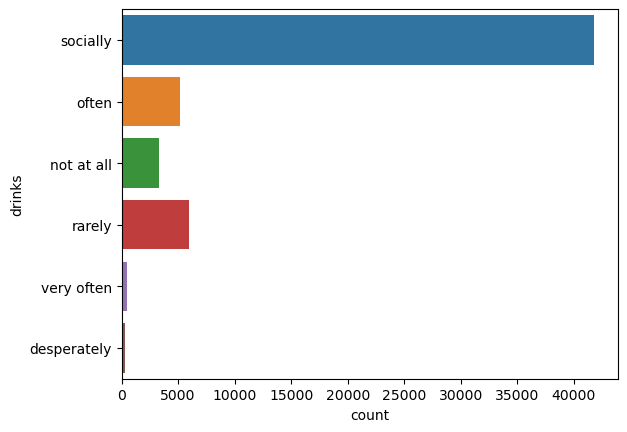

In [28]:
sns.countplot(data=profiles, y='drinks')

#### Drugs
The vast majority of users "never" use drugs.

<Axes: xlabel='count', ylabel='drugs'>

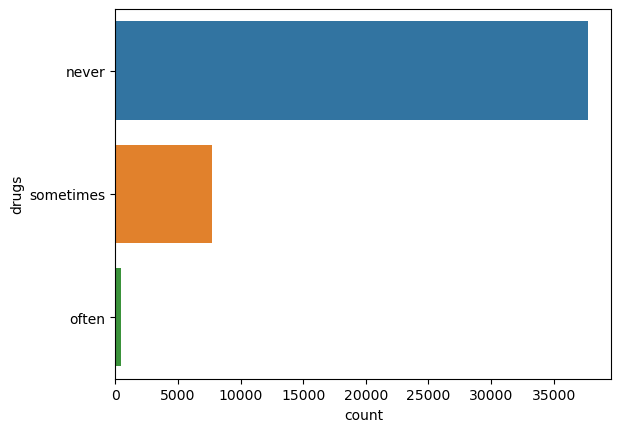

In [29]:
sns.countplot(data=profiles, y='drugs')

#### Signs
Here are the astrological signs of the users. There are mainly evenly distributed with Capricorns being the rarest and Leos being the most common.

<Axes: xlabel='count', ylabel='signsCleaned'>

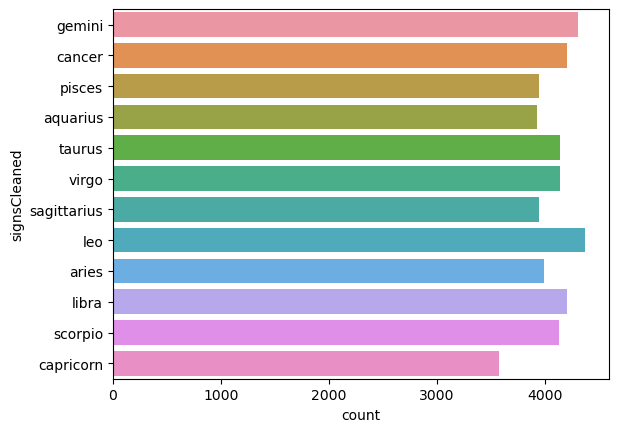

In [30]:
sns.countplot(data=profiles, y='signsCleaned')

#### Smoking
Similarly for drugs the majority of users chose "no" for smoking.

<Axes: xlabel='count', ylabel='smokes'>

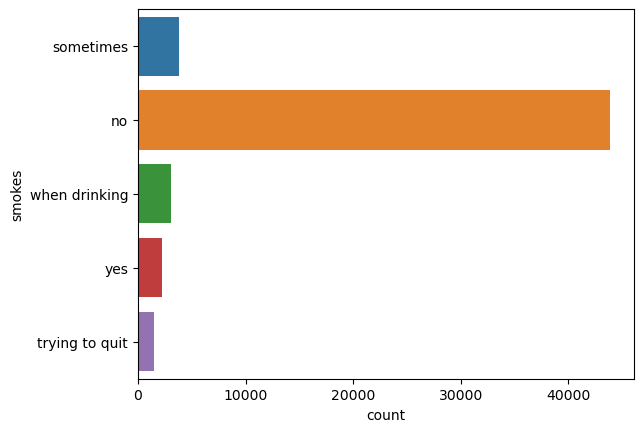

In [31]:
sns.countplot(data=profiles, y='smokes')

<Axes: xlabel='count', ylabel='religionCleaned'>

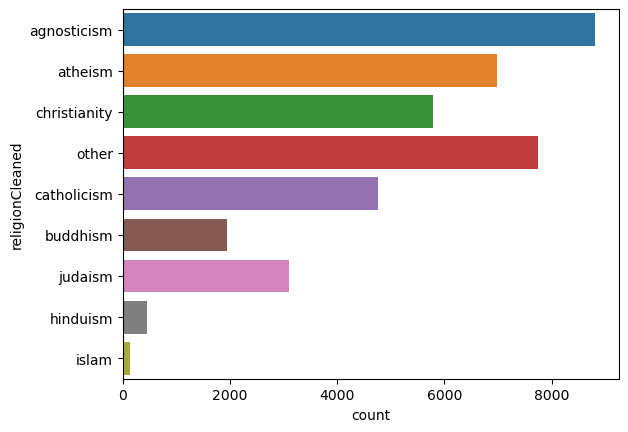

In [34]:
profiles['religionCleaned'] = profiles.religion.str.split().str.get(0)
sns.countplot(data=profiles, y='religionCleaned')

### Data Preparation

#### Missing Data

In [32]:
profiles.isnull().sum()

age                 0
body_type        5296
diet            24395
drinks           2985
drugs           14080
education        6628
essay0           5488
essay1           7572
essay2           9638
essay3          11476
essay4          10537
essay5          10850
essay6          13771
essay7          12451
essay8          19225
essay9          12603
ethnicity        5680
height              3
income              0
job              8198
last_online         0
location            0
offspring       35561
orientation         0
pets            19921
religion        20226
sex                 0
sign            11056
smokes           5512
speaks             50
status              0
signsCleaned    11056
dtype: int64

In [52]:
cols = ['body_type', 'diet', 'orientation', 'pets', 'religionCleaned', 'sex', 'job', 'signsCleaned']
df = profiles[cols].dropna()
df.shape

(16453, 8)

#### Dummy Variables
In this next step, dummy variables are created to deal with the categorical variables. Dummy variables will turn the categories per variable into its own binary identifier. The data now has 81 columns to predict signs.

In [53]:
for col in cols[:-1]:
    df = pd.get_dummies(df, columns=[col], prefix = [col])

In [54]:
df.head()

,signsCleaned,body_type_a little extra,body_type_athletic,body_type_average,body_type_curvy,body_type_fit,body_type_full figured,body_type_jacked,body_type_overweight,body_type_rather not say,...,job_military,job_other,job_political / government,job_rather not say,job_retired,job_sales / marketing / biz dev,job_science / tech / engineering,job_student,job_transportation,job_unemployed
0,gemini,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,cancer,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,taurus,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,sagittarius,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,cancer,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


#### Splitting the Data

In [55]:
col_length = len(df.columns)

X = df.iloc[:, 1:col_length]
Y = df.iloc[:, 0:1]

val_size = 0.25

from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = val_size, random_state = 0)

Y_train = Y_train.to_numpy().ravel()
Y_val = Y_val.to_numpy().ravel()

## Prediction

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

#### Logistic Regression

In [56]:
lr_model = LogisticRegression(multi_class='multinomial')
lr_model.fit(X_train, Y_train)
lr_predictions = lr_model.predict(X_train)

In [57]:
from sklearn.metrics import classification_report
print(classification_report(Y_train, lr_predictions))

              precision    recall  f1-score   support

    aquarius       0.13      0.07      0.09       968
       aries       0.12      0.10      0.11       983
      cancer       0.13      0.24      0.17      1129
   capricorn       0.14      0.05      0.07       882
      gemini       0.12      0.15      0.13      1130
         leo       0.12      0.19      0.15      1121
       libra       0.11      0.08      0.09      1028
      pisces       0.11      0.09      0.10       997
 sagittarius       0.13      0.09      0.11       965
     scorpio       0.14      0.05      0.08      1001
      taurus       0.13      0.12      0.12      1045
       virgo       0.12      0.21      0.15      1090

    accuracy                           0.12     12339
   macro avg       0.12      0.12      0.11     12339
weighted avg       0.12      0.12      0.12     12339



The final accuracy of the logistic regression model is 12% which is terrible considering a random guess should result in being correct ~8% of the time (1/12).

#### K Nearest Neighbor

In [58]:
knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(X_train, Y_train)
knn_predictions = knn_model.predict(X_train)

In [59]:
print(classification_report(Y_train, knn_predictions))

              precision    recall  f1-score   support

    aquarius       0.26      0.65      0.37       968
       aries       0.27      0.50      0.35       983
      cancer       0.27      0.41      0.33      1129
   capricorn       0.34      0.32      0.33       882
      gemini       0.37      0.34      0.35      1130
         leo       0.38      0.29      0.33      1121
       libra       0.39      0.26      0.31      1028
      pisces       0.40      0.25      0.31       997
 sagittarius       0.42      0.22      0.29       965
     scorpio       0.41      0.23      0.30      1001
      taurus       0.42      0.25      0.31      1045
       virgo       0.42      0.24      0.31      1090

    accuracy                           0.33     12339
   macro avg       0.36      0.33      0.32     12339
weighted avg       0.36      0.33      0.32     12339



This model had a 33% accuracy which is a good sign.

#### Decision Trees

In [60]:
cart_model = DecisionTreeClassifier()
cart_model.fit(X_train, Y_train)
cart_predictions = cart_model.predict(X_train)

In [61]:
print(classification_report(Y_train, cart_predictions))

              precision    recall  f1-score   support

    aquarius       0.67      0.94      0.78       968
       aries       0.66      0.88      0.75       983
      cancer       0.71      0.86      0.77      1129
   capricorn       0.74      0.84      0.79       882
      gemini       0.78      0.79      0.79      1130
         leo       0.80      0.80      0.80      1121
       libra       0.79      0.76      0.78      1028
      pisces       0.82      0.74      0.78       997
 sagittarius       0.91      0.70      0.79       965
     scorpio       0.89      0.71      0.79      1001
      taurus       0.93      0.70      0.80      1045
       virgo       0.94      0.67      0.78      1090

    accuracy                           0.78     12339
   macro avg       0.80      0.78      0.78     12339
weighted avg       0.80      0.78      0.78     12339



The results are very promising because it has a 78% accuracy with this model.

Below is a confusion matrix of the results with the true values on the y axis and predicted values along the x axis. Since the diagonals are lighter in color and have higher numbers, the accuracy is going to be high since those are the True Positives.

In [64]:
from sklearn.metrics import confusion_matrix
cart_cm = confusion_matrix(Y_train, cart_predictions)
cart_labels = cart_model.classes_

[Text(0, 0.5, 'aquarius'),
 Text(0, 1.5, 'aries'),
 Text(0, 2.5, 'cancer'),
 Text(0, 3.5, 'capricorn'),
 Text(0, 4.5, 'gemini'),
 Text(0, 5.5, 'leo'),
 Text(0, 6.5, 'libra'),
 Text(0, 7.5, 'pisces'),
 Text(0, 8.5, 'sagittarius'),
 Text(0, 9.5, 'scorpio'),
 Text(0, 10.5, 'taurus'),
 Text(0, 11.5, 'virgo')]

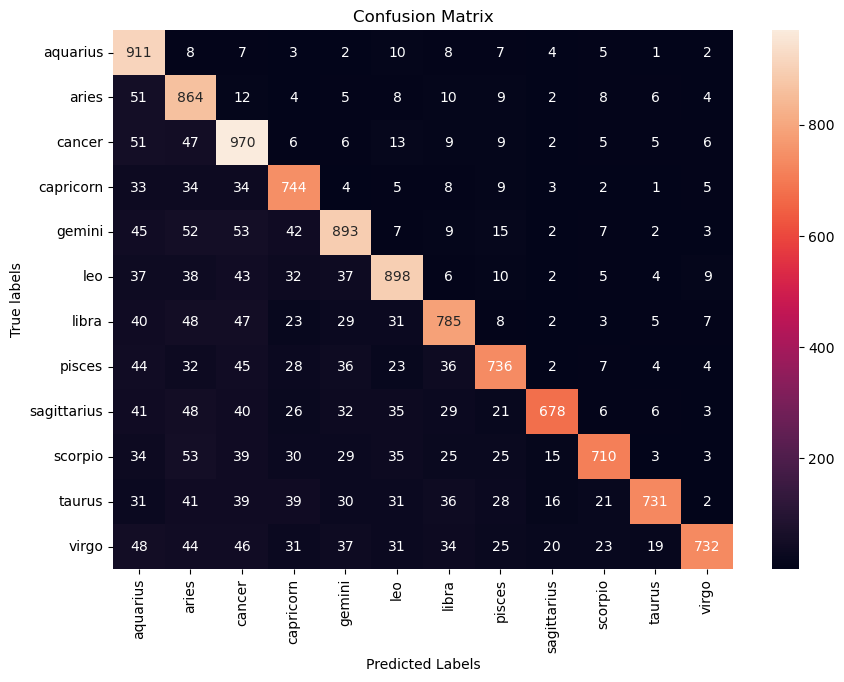

In [68]:
plt.figure(figsize=(10,7))

ax= plt.subplot()
sns.heatmap(cart_cm, annot=True, ax = ax, fmt='d')

ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(cart_labels)
ax.yaxis.set_ticklabels(cart_labels)

In [70]:
cart_model.get_depth()

49

Going back to the model, a quick analysis will show that this tree model has a depth of 49 branches, which will probably not generalize to another dataset. In this case this model has been "overfit" for this data.

In [71]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=5, shuffle=True, random_state=0)
results = cross_val_score(cart_model, X_train, Y_train, cv=kfold, scoring='accuracy')

print(results)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

[0.08508914 0.09278768 0.09116694 0.09602917 0.08877179]
Baseline: 9.08% (0.37%)


To make a point, a five fold cross validation is created with the same data. The results are worse than the KNN and about the Logistic Regression algorithms. the baseline was ~9%

The decision tree model will be made it again, but with a max_depth of 20 to stop the algorithm from reaching the stopping point. The new accuracy rate of ~41% is worse than the first iteration, but slightly better than the KNN model.

In [72]:
cart_model20 = DecisionTreeClassifier(max_depth = 20).fit(X_train, Y_train) 
cart_predictions20 = cart_model20.predict(X_train) 

In [73]:
print(classification_report(Y_train, cart_predictions20))

              precision    recall  f1-score   support

    aquarius       0.56      0.40      0.47       968
       aries       0.43      0.43      0.43       983
      cancer       0.37      0.50      0.42      1129
   capricorn       0.53      0.42      0.47       882
      gemini       0.41      0.44      0.42      1130
         leo       0.36      0.48      0.41      1121
       libra       0.29      0.42      0.34      1028
      pisces       0.65      0.34      0.44       997
 sagittarius       0.64      0.33      0.43       965
     scorpio       0.36      0.40      0.38      1001
      taurus       0.53      0.38      0.44      1045
       virgo       0.32      0.39      0.35      1090

    accuracy                           0.41     12339
   macro avg       0.45      0.41      0.42     12339
weighted avg       0.45      0.41      0.42     12339



In [74]:
results20 = cross_val_score(cart_model20, X_train, Y_train, cv=kfold, scoring='accuracy')

print(results20)
print("Baseline: %.2f%% (%.2f%%)" % (results20.mean()*100, results.std()*100))

[0.07860616 0.08670989 0.08589951 0.08306321 0.09039319]
Baseline: 8.49% (0.37%)


### Final Model



In [75]:
knn_predictionsVal = knn_model.predict(X_val) 
print(classification_report(Y_val, knn_predictionsVal))

              precision    recall  f1-score   support

    aquarius       0.07      0.22      0.11       294
       aries       0.09      0.15      0.11       345
      cancer       0.08      0.13      0.10       328
   capricorn       0.09      0.08      0.09       315
      gemini       0.08      0.08      0.08       366
         leo       0.08      0.06      0.07       395
       libra       0.10      0.07      0.08       326
      pisces       0.09      0.06      0.07       337
 sagittarius       0.09      0.04      0.05       347
     scorpio       0.10      0.05      0.07       355
      taurus       0.11      0.07      0.08       345
       virgo       0.10      0.06      0.07       361

    accuracy                           0.09      4114
   macro avg       0.09      0.09      0.08      4114
weighted avg       0.09      0.09      0.08      4114



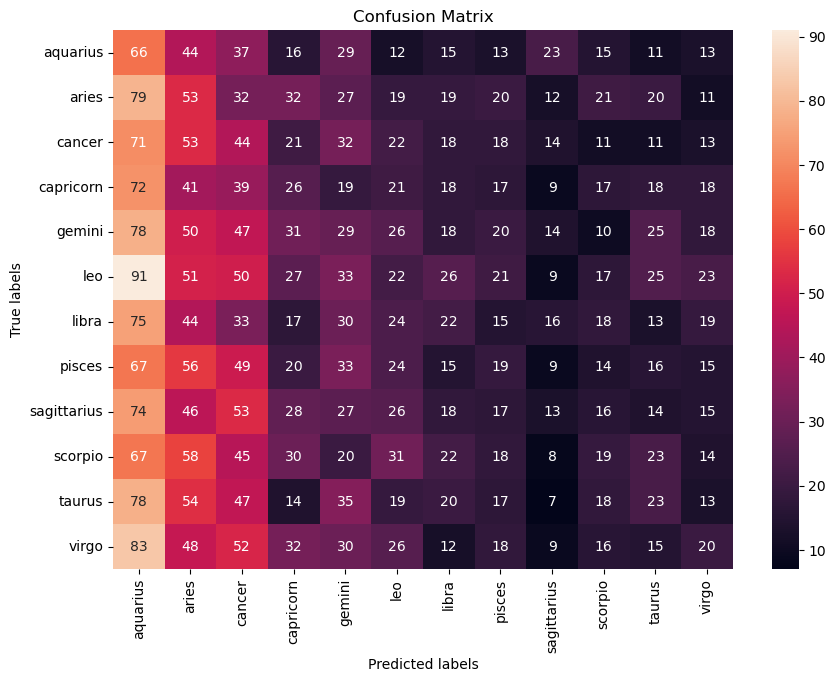

In [76]:
final_cm = confusion_matrix(Y_val, knn_predictionsVal)
knn_labels = knn_model.classes_

plt.figure(figsize=(10,7))

ax= plt.subplot()
sns.heatmap(final_cm, annot=True, ax = ax, fmt="d");

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(knn_labels); 
ax.yaxis.set_ticklabels(knn_labels);

### Conclusion
#### General Comments
In this project machine learning was used to predict the astrological signs of OkCupid users. This is an important feature since many people believe in astrology and matches between compatible star signs. If users don't input their signs, an algorithmic solution could have generated a sign to impute missing data when making matches.

Alas, the final selected algorithm did no better than basic guessing.